In [8]:
import pandas as pd
import numpy as np

from plotly.graph_objs import *
import plotly.graph_objects as go
import plotly.express as px

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import ListedColormap
from matplotlib.collections import PatchCollection

import requests
from PIL import Image
from io import BytesIO

In [2]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-04/water.csv'
)

In [3]:
df

,row_id,lat_deg,lon_deg,report_date,status_id,water_source,water_tech,facility_type,country_name,install_year,installer,pay,status
0,3957,8.073136,38.617037,04/06/2017,y,NaN,NaN,NaN,Ethiopia,NaN,Private-CRS,NaN,NaN
1,33512,7.373784,40.503824,08/04/2020,y,Protected Spring,NaN,Improved,Ethiopia,2019.0,WaterAid,NaN,NaN
2,35125,0.773458,34.929509,03/18/2015,y,Protected Shallow Well,NaN,Improved,Kenya,NaN,NaN,NaN,NaN
3,37760,0.780576,34.963640,03/18/2015,y,Borehole,NaN,Improved,Kenya,NaN,NaN,NaN,NaN
4,38118,0.779266,34.971120,03/18/2015,y,Protected Shallow Well,NaN,Improved,Kenya,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473288,575928,0.013856,35.461322,09/19/2014,y,Surface Water (River/Stream/Lake/Pond/Dam),NaN,No facilities,Kenya,NaN,NaN,NaN,NaN
473289,576842,2.953830,31.362132,04/30/2010,n,Borehole,NaN,Improved,Uganda,2003.0,NaN,Water Committee Collects Fees,Non-Functional
473290,577245,3.089335,31.061997,05/08/2010,n,Borehole,NaN,Improved,Uganda,1995.0,NaN,NaN,Non-Functional
473291,577698,2.975277,31.085539,04/21/2010,y,Borehole,NaN,Improved,Uganda,1995.0,NaN,NaN,Functional


In [ ]:
df['report_year'] = df.report_date.str[-4:]

In [ ]:
def plot_axes(country,ax): 
  viz = (df
         .loc[df.country_name==country]
         .fillna(0)
         .groupby('install_year')[['install_year']]
         .count()
         .loc[1975:2020]
         )
  ax.set_axis_off()
  col = PatchCollection([
      Rectangle((y, 0), 1, 1)
      for y in range(viz.index.astype(int).min(), viz.index.astype(int).max()+ 1)
  ])
  col.set_array(viz.install_year)
  col.set_cmap(cmap)
  ax.add_collection(col)
  ax.set_ylim(0, 1)
  ax.set_xlim(viz.index.astype(int).min(), viz.index.astype(int).max() + 1)

In [ ]:
def plot_flags(x,y,country):
  c = fig.add_axes([x,y,0.15,0.15]) # badge
  c.axis("off")
  url_c = f'https://raw.githubusercontent.com/hampusborgos/country-flags/main/png250px/{country.lower()}.png'
  response_c = requests.get(url_c)
  img_c = Image.open(BytesIO(response_c.content))
  c.imshow(img_c)

In [ ]:
flags = [
         'Uganda','Nigeria','Sierra Leone','Liberia','Ethiopia',
         'Tanzania, United Republic of','Swaziland','Zimbabwe','Ghana','Kenya'
         ]

url = requests.get('https://raw.githubusercontent.com/hampusborgos/country-flags/main/countries.json')
p = url.json()

fl = {k:v for k,v in p.items() if v in flags}
fl

{'ET': 'Ethiopia',
 'GH': 'Ghana',
 'KE': 'Kenya',
 'LR': 'Liberia',
 'NG': 'Nigeria',
 'SL': 'Sierra Leone',
 'SZ': 'Swaziland',
 'TZ': 'Tanzania, United Republic of',
 'UG': 'Uganda',
 'ZW': 'Zimbabwe'}

In [ ]:
countries = [
         'Uganda','Nigeria','Sierra Leone','Liberia','Ethiopia',
         'Tanzania','Swaziland','Zimbabwe','Ghana','Kenya'
         ]

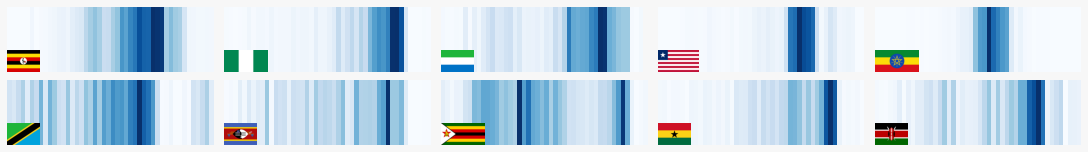

In [ ]:
cmap = plt.get_cmap('Blues')

fig, ax = plt.subplots(2,5, figsize=(15,2), constrained_layout=True,sharex=True,facecolor='#f7f7f7')

ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10 = ax.flatten()

for i,j in zip(countries,ax.flatten()):
  plot_axes(i,j)

plot_flags(-0.0573,0.526,"ug")
plot_flags(0.1487,0.526,"ng")
plot_flags(0.3442,0.526,"sl")
plot_flags(0.5491,0.526,"lr")
plot_flags(0.751,0.526,"et")
plot_flags(-0.0573,0.0216,"tz")
plot_flags(0.1437,0.0216,"sz")
plot_flags(0.3493,0.0216,"zw")
plot_flags(0.5451,0.0216,"gh")
plot_flags(0.7461,0.0216,"ke")

plt.savefig('wk8_water.png',dpi=300,bbox_inches='tight',facecolor=fig.get_facecolor())

In [ ]:
df.country_name.value_counts().head(10)

Uganda          119671
Nigeria          83703
Sierra Leone     67706
Liberia          33781
Ethiopia         25917
Tanzania         24923
Swaziland        23913
Zimbabwe         23695
Ghana            21334
Kenya            12153
Name: country_name, dtype: int64

In [6]:
df.water_tech.value_counts()

Hand Pump                   82176
Tapstand                    61312
Hand Pump - Afridev         38302
Mechanized Pump             33109
Hand Pump - India Mark      32365
Rope and Bucket             22138
Hand Pump - Nira             6775
Hand Pump - Kardia           4286
Hand Pump - Vergnet          3408
Hand Pump - SWN 80           1861
Kiosk                        1707
Hand Pump - PB Mark II        929
Hand Pump - Consallen         721
Hand Pump - Inkar             615
Mechanized Pump - Solar       568
Hand Pump - Canzee            350
Hydram                         69
Mechanized Pump - Diesel       11
Hand Pump - Indus               1
Name: water_tech, dtype: int64

In [85]:
df['tech'] = (np
              .where(
                  df.water_tech.str.contains('Hand Pump'),
                  'Hand Pump',
                  df.water_tech
              )
              )

df.tech = (np
              .where(
                  df.tech.str.contains('Mechanized Pump'),
                  'Mechanized Pump',
                  df.tech
              )
              )

In [86]:
df.tech.value_counts()

Hand Pump          354379
Tapstand            61312
Mechanized Pump     33688
Rope and Bucket     22138
Kiosk                1707
Hydram                 69
Name: tech, dtype: int64

In [91]:
viz = (pd
       .DataFrame(
           df
           .groupby(["country_name",'tech'])
           .tech
           .count()
           .sort_values()
           .groupby(level=0)
           .tail(1)
    )
       .rename(columns={'tech':'count'})
       .reset_index()
       .merge(df
              .groupby(["country_name"])[['tech']]
              .count()
              .reset_index()
              .rename(columns={'tech':'total'}),
              on='country_name')
       )

viz

,country_name,tech,count,total
0,Burundi,Mechanized Pump,2,2
1,Angola,Mechanized Pump,4,5
2,Dominican Republic,Mechanized Pump,6,6
3,Mauritania,Mechanized Pump,7,7
4,Egypt,Hand Pump,8,8
5,South Africa,Tapstand,13,15
6,Algeria,Mechanized Pump,14,14
7,Namibia,Hand Pump,15,21
8,Sudan,Hand Pump,18,34
9,Chad,Hand Pump,25,35


In [93]:
import plotly.express as px

fig = px.choropleth(
    viz,
    locations=viz['country_name'], 
    locationmode="country names",
    color=viz['tech'],
    color_discrete_map={'Hand Pump':'#1dd36c',
                        'Mechanized Pump':'#1dafd3',
                        'Tapstand':'#d31d54'},
    hover_data = ['country_name','count','total'],
    labels={'country_name':'Country','tech':'Most Common','count':'Count Type','total':'Count Total'},
    scope="africa"
  )

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=10,
        r=10,
        b=10,
        t=50,
        pad=4
        ),
    title={
        'text': "Most Common Water Transportation<br>Systems in African Countries",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
        },
    legend=dict(x=0.1, y=0,title=''),
    legend_orientation="h"
  )

(fig
 .update_traces(
     marker_line_width=1, 
     marker_opacity=0.85)
 )

fig.show()

fig.write_html("wk9_water.html")